In [ ]:
#User to install seaborn, pandas, db-dtypes and scikit-learn if haven't already done so
#User to authenticate account with the gcloud CLI, if havent already done so

In [1]:
#importing libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from google.cloud import bigquery

/opt/anaconda3/envs/elt/lib/python3.10/site-packages/google/api_core/_python_version_support.py:266: FutureWarning: You are using a Python version (3.10.18) which Google will stop supporting in new releases of google.api_core once it reaches its end of life (2026-10-04). Please upgrade to the latest Python version, or at least Python 3.11, to continue receiving updates for google.api_core past that date.
  warnings.warn(message, FutureWarning)


In [2]:
client = bigquery.Client(project="durable-ripsaw-477914-g0")

In [3]:
# Performing basic EDA
query_customer = """
SELECT *
    
FROM `durable-ripsaw-477914-g0.ecommerce.fact_customer`
"""

In [4]:
query_orders = """
SELECT *

FROM `durable-ripsaw-477914-g0.ecommerce.fact_orders`
"""

In [5]:
df_customer=client.query(query_customer).to_dataframe()
df_orders = client.query(query_orders).to_dataframe()

/opt/anaconda3/envs/elt/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
df_customer.describe

<bound method NDFrame.describe of                              customer_id                customer_unique_id  \
0       fc768a2275c44d9383cc6926adac469d  ca9047711198032d7f41114bd56bf7ae   
1       3532ba38a3fd242259a514ac2b6ae6b6  4fa4365000c7090fcb8cad5713c6d3db   
2       a746c825432e5eaf2b8eeece33ca54b7  4fa93a79d18bde53d24a18e313fd22a7   
3       4a12498b256c30e2e59cf2ae246222b7  f988e05b9c8653f57178a723dc42cfe9   
4       8b20eb37b30208feef373de67fc749e0  c9d0b6cc7d9fccb750ba1cc6c4b76ecb   
...                                  ...                               ...   
107314  a7693fba2ff9583c78751f2b66ecab9d  f7ea4eef770a388bd5b225acfc546604   
107315  adb32467ecc74b53576d9d13a5a55891  11f97da02237a49c8e783dfda6f50e8e   
107316  be1b70680b9f9694d8c70f41fa3dc92b  c402f431464c72e27330a67f7b94d4fb   
107317  bd5d39761aa56689a265d95d8d32b8be  698e1cf81d01a3d389d96145f7fa6df8   
107318  fc3d1daec319d62d49bfb5e1f83123e9  4546caea018ad8c692964e3382debd19   

        customer_zip      cus

In [7]:
df_orders.describe

<bound method NDFrame.describe of                                order_id                       customer_id  \
0      bfbd0f9bdef84302105ad712db648a6c  86dc2ffce2dfff336de2f386a786e574   
1      d9bde3a634ec04252eceffc6bef25ee0  b08f0b7d2087f0649c16b1215d467d81   
2      e5215415bb6f76fe3b7cb68103a0d1c0  b6f6cbfc126f1ae6723fe2f9b3751208   
3      a6f980db92567852107fe54fa64726f2  f7e9bfeb793e02ca1a2fbadb9e1f4a69   
4      998b90bcfc77ff711912c1c14dcff885  0b1899150b4ee7ae778d02ecb621324f   
...                                 ...                               ...   
99436  880835c91a5227560bdb8d0f45c60579  410a24845e470f3c52bb78f084d359b5   
99437  d815bd2c2bdd79e4c0e0263caa986d66  04d7d73089b39d83f81b829cbd98e43d   
99438  4f21594649a0235ad65ded11ba7c8ea7  6a78c7286417b74603c44bb8562c9f15   
99439  94b35c9542f07ad80b3367f9051b63af  ae3a3a6fd9128d8617e2cb3a88a7598b   
99440  7ab9c55c59eaeea579d047e2d8aaed81  feca0f935fcce79dd42d409d96af9645   

       order_purchase_timestamp order_del

In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107319 entries, 0 to 107318
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype              
---  ------                      --------------   -----              
 0   customer_id                 107319 non-null  object             
 1   customer_unique_id          107319 non-null  object             
 2   customer_zip                107319 non-null  Int64              
 3   customer_city               107319 non-null  object             
 4   customer_state              107319 non-null  object             
 5   first_purchase_timestamp    107319 non-null  datetime64[us, UTC]
 6   last_purchase_timestamp     107319 non-null  datetime64[us, UTC]
 7   dim_total_orders            107319 non-null  Int64              
 8   avg_days_between_orders     107319 non-null  float64            
 9   stddev_days_between_orders  107319 non-null  float64            
 10  dim_total_revenue           107319 non-null 

In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   order_id                       99441 non-null  object             
 1   customer_id                    99441 non-null  object             
 2   order_purchase_timestamp       99441 non-null  datetime64[us, UTC]
 3   order_delivered_customer_date  96476 non-null  datetime64[us, UTC]
 4   order_estimated_delivery_date  99441 non-null  datetime64[us, UTC]
 5   num_items                      99441 non-null  Int64              
 6   total_order_value              99441 non-null  float64            
 7   total_freight                  99441 non-null  float64            
 8   seller_count                   99441 non-null  Int64              
 9   multiple_sellers               99441 non-null  Int64              
 10  primary_seller_id     

In [10]:
print(df_customer.isna().sum())

customer_id                   0
customer_unique_id            0
customer_zip                  0
customer_city                 0
customer_state                0
first_purchase_timestamp      0
last_purchase_timestamp       0
dim_total_orders              0
avg_days_between_orders       0
stddev_days_between_orders    0
dim_total_revenue             0
dim_avg_order_value           0
days_since_last_purchase      0
total_orders                  0
total_revenue                 0
avg_order_value               0
avg_items_per_order           0
avg_freight_per_order         0
late_delivery_rate            0
pct_multiple_sellers          0
pct_credit_card               1
pct_debit_card                1
pct_voucher                   1
pct_boleto                    1
avg_payment_value             1
avg_credit_card_payment       1
pref_credit_over_debit        0
pref_credit_over_boleto       0
r_bucket                      0
f_bucket                      0
m_bucket                      0
dtype: i

In [24]:
df_customer_clean = df_customer.dropna()

In [25]:
df_customer_clean.head(20)

,customer_id,customer_unique_id,customer_zip,customer_city,customer_state,first_purchase_timestamp,last_purchase_timestamp,dim_total_orders,avg_days_between_orders,stddev_days_between_orders,...,pct_debit_card,pct_voucher,pct_boleto,avg_payment_value,avg_credit_card_payment,pref_credit_over_debit,pref_credit_over_boleto,r_bucket,f_bucket,m_bucket
0,fc768a2275c44d9383cc6926adac469d,ca9047711198032d7f41114bd56bf7ae,88810,criciuma,SC,2018-08-23 15:17:19+00:00,2018-08-23 15:17:19+00:00,1,0.0,0.0,...,0.0,1.0,0.0,122.38,0.0,0,0,1,4,5
1,3532ba38a3fd242259a514ac2b6ae6b6,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,2018-08-28 15:26:39+00:00,2018-08-28 15:26:39+00:00,1,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0,0,1,3,5
2,a746c825432e5eaf2b8eeece33ca54b7,4fa93a79d18bde53d24a18e313fd22a7,1227,sao paulo,SP,2017-05-15 10:57:13+00:00,2017-05-15 10:57:13+00:00,1,0.0,0.0,...,0.0,0.0,1.0,339.45,0.0,0,0,5,3,5
3,4a12498b256c30e2e59cf2ae246222b7,f988e05b9c8653f57178a723dc42cfe9,6045,osasco,SP,2017-07-12 18:26:00+00:00,2017-07-12 18:26:00+00:00,1,0.0,0.0,...,0.0,0.0,1.0,82.50,0.0,0,0,5,2,5
4,8b20eb37b30208feef373de67fc749e0,c9d0b6cc7d9fccb750ba1cc6c4b76ecb,38627,palmital de minas,MG,2017-03-21 20:20:14+00:00,2017-03-21 20:20:14+00:00,1,0.0,0.0,...,0.0,0.0,1.0,29.42,0.0,0,0,5,2,5
5,d4ebaccdb4593f7460e7936aca80db92,60388892b3a10e0ea526461023be6fbe,3220,sao paulo,SP,2018-01-12 12:30:21+00:00,2018-01-12 12:30:21+00:00,1,0.0,0.0,...,0.0,0.0,1.0,59.00,0.0,0,0,3,1,5
6,18ee349e6fe0fa105ac44232ac1f4d06,78b9dd8b77ff3abe5f5b84bc2b030d1f,11630,ilhabela,SP,2018-03-31 19:08:47+00:00,2018-03-31 19:08:47+00:00,1,0.0,0.0,...,0.0,0.0,1.0,68.23,0.0,0,0,2,5,5
7,2f0524a7b1b3845a1a57fcf3910c4333,d05c44a138277ad325d915c6b7ccbcdf,5344,sao paulo,SP,2018-09-06 18:45:47+00:00,2018-09-06 18:45:47+00:00,1,0.0,0.0,...,0.0,1.0,0.0,107.13,0.0,0,0,1,1,5
8,1a5c814c2a163354a550737c7c16be75,a97fc625e3f3081e1c7385e69dbebf75,26050,nova iguacu,RJ,2018-07-31 09:55:46+00:00,2018-07-31 09:55:46+00:00,1,0.0,0.0,...,0.0,0.0,1.0,101.88,0.0,0,0,1,4,5
9,df20748206e4b865b2f14a5eabbfcf34,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,2018-01-16 14:27:59+00:00,2018-01-16 14:27:59+00:00,1,0.0,0.0,...,0.0,0.0,1.0,210.09,0.0,0,0,3,5,5


In [31]:
df_customer_clean['avg_days_between_orders'].unique()

array([0.])

In [32]:
df_customer_clean['stddev_days_between_orders'].unique()

array([0.])

In [33]:
df_customer_clean['pct_credit_card'].unique()

array([0.        , 1.        , 0.5       , 0.33333333, 0.66666667,
       0.25      , 0.75      , 0.8       , 0.42857143, 0.71428571])

In [34]:
df_customer_clean['avg_credit_card_payment'].unique()

array([   0.  ,   16.97,   18.37, ...,  528.78,  783.  , 2262.8 ])

In [35]:
df_customer_clean['dim_total_orders'].unique()

<IntegerArray>
[1]
Length: 1, dtype: Int64

In [36]:
df_customer_clean['dim_total_revenue'].unique()

array([   0.  ,  197.55,   69.46, ..., 2202.4 , 2262.8 ,  196.17])

In [38]:
df_customer_clean = df_customer_clean.drop(columns=['avg_days_between_orders','stddev_days_between_orders', 'dim_total_orders'])

In [39]:
df_customer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107318 entries, 0 to 107318
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   customer_id               107318 non-null  object             
 1   customer_unique_id        107318 non-null  object             
 2   customer_zip              107318 non-null  Int64              
 3   customer_city             107318 non-null  object             
 4   customer_state            107318 non-null  object             
 5   first_purchase_timestamp  107318 non-null  datetime64[us, UTC]
 6   last_purchase_timestamp   107318 non-null  datetime64[us, UTC]
 7   dim_total_revenue         107318 non-null  float64            
 8   dim_avg_order_value       107318 non-null  float64            
 9   days_since_last_purchase  107318 non-null  Int64              
 10  total_orders              107318 non-null  Int64              
 11  total

In [41]:
print(df_orders.isna().sum())

order_id                            0
customer_id                         0
order_purchase_timestamp            0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
num_items                           0
total_order_value                   0
total_freight                       0
seller_count                        0
multiple_sellers                    0
primary_seller_id                 775
late_delivery_flag                  0
total_payment                       1
payment_type_credit_card            1
payment_type_debit_card             1
payment_type_voucher                1
payment_type_boleto                 1
customer_unique_id                  0
customer_zip                        0
customer_city                       0
customer_state                      0
seller_zip                        775
seller_city                       775
seller_state                      775
late_delivery_rate                775
dtype: int64


In [42]:
df_orders_clean = df_orders.dropna()

In [43]:
df_orders_clean.head(20)

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,num_items,total_order_value,total_freight,seller_count,multiple_sellers,...,payment_type_voucher,payment_type_boleto,customer_unique_id,customer_zip,customer_city,customer_state,seller_zip,seller_city,seller_state,late_delivery_rate
606,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,2017-09-26 22:17:05+00:00,2017-10-07 16:12:47+00:00,2017-10-30 00:00:00+00:00,1,916.02,21.02,1,0,...,0,0,3c7e305796add66698959fc7ad176f6b,87502,umuarama,PR,9080,santo andre,SP,0.000
607,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,2017-10-12 13:33:22+00:00,2017-10-24 20:17:44+00:00,2017-11-06 00:00:00+00:00,1,916.02,21.02,1,0,...,0,0,9915eb9f74b6c11aaf04833f65b00e93,38600,paracatu,MG,9080,santo andre,SP,0.000
608,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,2017-10-18 08:16:34+00:00,2017-10-27 16:46:05+00:00,2017-11-09 00:00:00+00:00,1,916.02,21.02,1,0,...,0,0,9de5797cddb92598755a0f76383ddbbb,35490,entre rios de minas,MG,9080,santo andre,SP,0.000
609,f100e6de2729471b754facdcdb55b3e4,b550b22f8a92af4e89c41f27b2330b48,2017-06-30 11:08:44+00:00,2017-07-07 19:47:31+00:00,2017-07-24 00:00:00+00:00,1,132.02,32.03,1,0,...,0,0,037a72c77c3565c6e41ac0607c797b08,22783,rio de janeiro,RJ,29156,cariacica,ES,0.065
611,475ff6348f62b515f96894937c01358d,7bf8183e6301c1bc4f8b012752f50749,2017-12-27 22:06:41+00:00,2018-01-05 13:39:45+00:00,2018-01-26 00:00:00+00:00,1,140.08,41.08,1,0,...,0,0,5f50beacf921f29b16de69faccb2680a,14770,colina,SP,29156,cariacica,ES,0.065
612,2f382dc90733d9d7e7db788f9a954fbe,e2157bd7eb4af4b0cb8cc0fd2ef04bb0,2018-01-12 13:50:31+00:00,2018-01-20 19:18:46+00:00,2018-02-09 00:00:00+00:00,1,144.99,45.99,1,0,...,0,0,7d9d415ed423ad04c3a75aeff3ba68df,45994,teixeira de freitas,BA,29156,cariacica,ES,0.065
613,0d6fbe13e1bee14aa67cfcda25ee1781,a85aa0eaabbe195c286dedb52f4c8d21,2017-07-04 22:57:31+00:00,2017-07-13 21:37:02+00:00,2017-07-26 00:00:00+00:00,1,131.02,32.02,1,0,...,0,0,b11721d9def930052187b45b2b59a3b4,21550,rio de janeiro,RJ,29156,cariacica,ES,0.065
614,c1dd50c37114a20341bbf901157d726d,e506618caa63a29ae2cc528536f0d11e,2017-06-16 16:29:49+00:00,2017-06-26 16:06:23+00:00,2017-07-10 00:00:00+00:00,1,128.95,39.95,1,0,...,0,0,e77efb6522986a5e862a54dd91251bb3,26900,miguel pereira,RJ,29156,cariacica,ES,0.065
615,225d6c38f3b55e64713038cbb2a7d357,9e65cbbe0b4f517550e04293b56818af,2018-03-13 10:27:41+00:00,2018-03-22 20:13:01+00:00,2018-04-09 00:00:00+00:00,1,168.02,67.02,1,0,...,0,0,3f6bfbf0a0cde14c8953261e92f7d9d2,45310,ubaira,BA,29156,cariacica,ES,0.065
616,9d7798901074855d45d6c586a0714942,dc7d9d7ec0b6cbadacf27e3308c17976,2017-04-20 09:22:08+00:00,2017-04-28 12:29:14+00:00,2017-05-12 00:00:00+00:00,2,308.28,30.28,1,0,...,0,0,5ce1e506e8e4eb088257ce0888336dd6,22793,rio de janeiro,RJ,29156,cariacica,ES,0.065


In [44]:
df_orders_clean['num_items'].unique()

<IntegerArray>
[1, 2, 3, 4, 5, 7, 6, 10, 15, 9, 11, 21, 8, 12, 20, 14, 13]
Length: 17, dtype: Int64

In [45]:
df_orders_clean['seller_count'].unique()

<IntegerArray>
[1, 2, 3, 4, 5]
Length: 5, dtype: Int64

In [54]:
df_customer_num = df_customer_clean.select_dtypes(include =['number'])

In [55]:
df_customer_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107318 entries, 0 to 107318
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_zip              107318 non-null  Int64  
 1   dim_total_revenue         107318 non-null  float64
 2   dim_avg_order_value       107318 non-null  float64
 3   days_since_last_purchase  107318 non-null  Int64  
 4   total_orders              107318 non-null  Int64  
 5   total_revenue             107318 non-null  float64
 6   avg_order_value           107318 non-null  float64
 7   avg_items_per_order       107318 non-null  float64
 8   avg_freight_per_order     107318 non-null  float64
 9   late_delivery_rate        107318 non-null  float64
 10  pct_multiple_sellers      107318 non-null  float64
 11  pct_credit_card           107318 non-null  float64
 12  pct_debit_card            107318 non-null  float64
 13  pct_voucher               107318 non-null  float6

In [58]:
df_customer_num= df_customer_num[['total_revenue','avg_items_per_order','pct_credit_card','pct_voucher','pct_debit_card','pct_boleto','pref_credit_over_debit','pref_credit_over_boleto']]

In [59]:
#Correlation matrix
customer_correlation_matrix = df_customer_num.corr()
print(customer_correlation_matrix)

                         total_revenue  avg_items_per_order  pct_credit_card  \
total_revenue                 1.000000             0.222768         0.043079   
avg_items_per_order           0.222768             1.000000        -0.011417   
pct_credit_card               0.043079            -0.011417         1.000000   
pct_voucher                  -0.020997            -0.025915        -0.096236   
pct_debit_card               -0.017161            -0.007516        -0.226392   
pct_boleto                   -0.032206             0.024230        -0.910966   
pref_credit_over_debit        0.055641            -0.012529         0.989389   
pref_credit_over_boleto       0.042352            -0.013451         0.990724   

                         pct_voucher  pct_debit_card  pct_boleto  \
total_revenue              -0.020997       -0.017161   -0.032206   
avg_items_per_order        -0.025915       -0.007516    0.024230   
pct_credit_card            -0.096236       -0.226392   -0.910966   
pct_vou

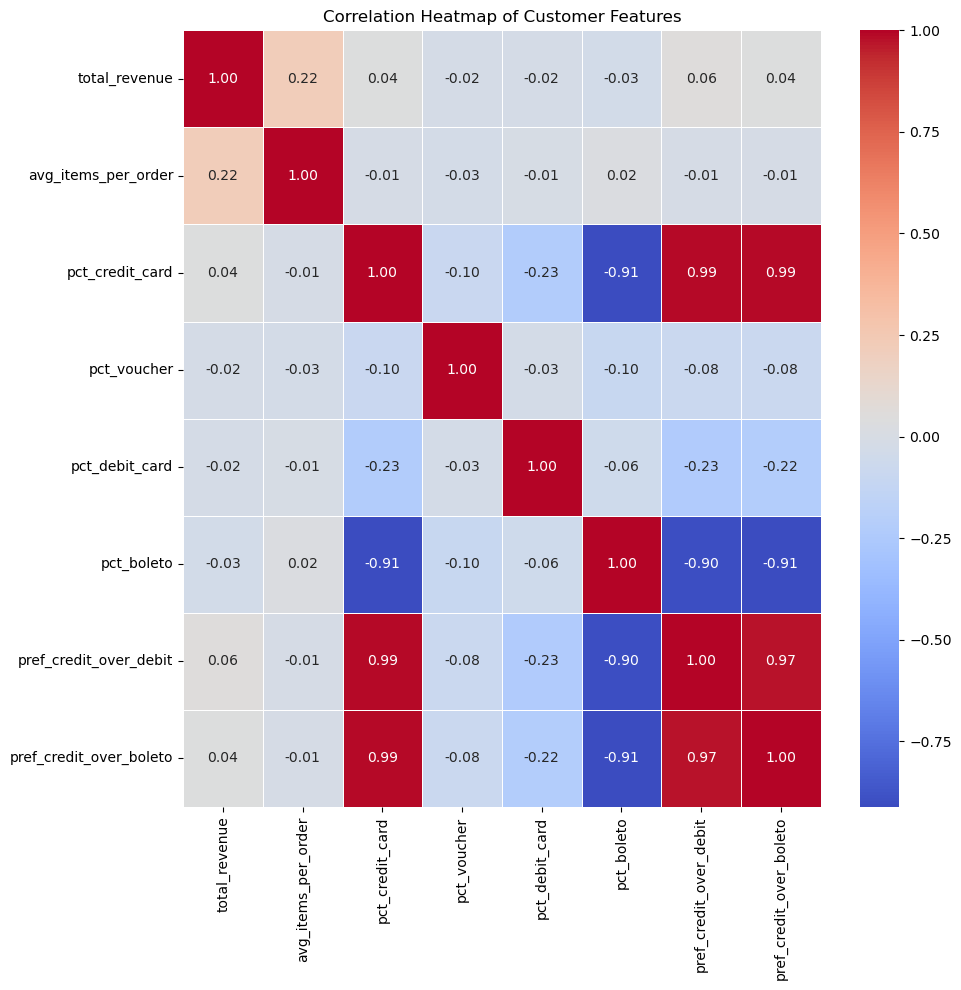

In [61]:
plt.figure(figsize=(10, 10)) # Adjust figure size as needed
sns.heatmap(customer_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Customer Features')
plt.tight_layout()
plt.show()

In [ ]:
#Attempts to establish correlational between types/preference of payment types to total revenue. Found weak relations.

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [64]:
# Selection of features for ML Modeling
query_ml = """
SELECT
    --From fact_customer
    c.customer_state,
    c.customer_zip,
    c.total_revenue,

    --From fact_orders
    o.total_freight,
    o.total_payment
    
FROM `durable-ripsaw-477914-g0.ecommerce.fact_customer` c
LEFT JOIN `durable-ripsaw-477914-g0.ecommerce.fact_orders` o on o.customer_id = c.customer_id
"""

In [65]:
df_ml=client.query(query_ml).to_dataframe()

/opt/anaconda3/envs/elt/lib/python3.10/site-packages/google/cloud/bigquery/table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [68]:
y = df_ml['total_freight']
X = df_ml.drop(columns='total_freight')

In [76]:
num_features = ['customer_zip','total_revenue','total_payment']
cat_features = ['customer_state']

In [77]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 85855
Testing samples: 21464


In [84]:
# Numeric transformer: fill missing values, then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # fill NaN with mean
    ('scaler', StandardScaler())
])

# Categorical transformer: fill missing values, then one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fill NaN with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ],
    remainder='drop'  # drop other columns
)

In [81]:
def evaluate_model(model_name, y_true, y_pred):
    """Calculates and prints key regression performance metrics."""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"--- {model_name} Performance ---")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * 40)
    return {'RMSE': rmse, 'MAE': mae, 'R2': r2}

In [85]:
print("Starting Linear Regression (Baseline) Training...")

# Create the full pipeline for Linear Regression
lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
lr_metrics = evaluate_model("Linear Regression (Baseline)", y_test, y_pred_lr)

Starting Linear Regression (Baseline) Training...
--- Linear Regression (Baseline) Performance ---
Root Mean Squared Error (RMSE): 17.91
Mean Absolute Error (MAE): 8.73
R-squared (R2): 0.3007
----------------------------------------
